<a href="https://colab.research.google.com/github/mytnnguyen/Sentiment-Analysis-Stock-Markets/blob/main/ML_INFXStockPrice_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Machine Learning for Stock Price prediction

## Learning Objectives:

- Get historical stock prices from Yahoo!Finance

- Use multiple machine learning models to predict stock prices

*Notes*: We will analyse stock prices of Infineon Technologies AG (Germany)

## 1. Retrieve Stock Prices

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt
import os

In [ ]:
plt.style.available

In [83]:
plt.style.use('fivethirtyeight')

In [2]:
# Retrieve stock price of Infineon
ifx_df = yf.download("IFX.DE", start = dt.datetime(2000,1,1), end = dt.datetime(2023,5,20))

# See the data
ifx_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-13,67.313232,75.774193,58.629375,62.641422,51.925529,21611471
2000-03-14,63.657810,71.325279,63.657810,70.344551,58.310917,10744802
2000-03-15,68.561424,68.606003,63.122871,65.119980,53.980091,6567106
2000-03-16,65.298294,65.298294,62.329376,62.677086,51.955090,4547656
2000-03-17,64.905998,66.234436,62.908894,63.746967,52.841957,2333220
...,...,...,...,...,...,...
2023-05-15,33.825001,34.014999,33.389999,33.445000,33.445000,2051794
2023-05-16,33.775002,34.400002,33.735001,34.200001,34.200001,3275712
2023-05-17,34.060001,34.470001,33.910000,34.404999,34.404999,2302952


In [ ]:
# Save data
#print(os.getcwd())
ifx_df.to_csv('./data/stockmarket/infineon_prices_270523.csv', sep = ';', index = False)

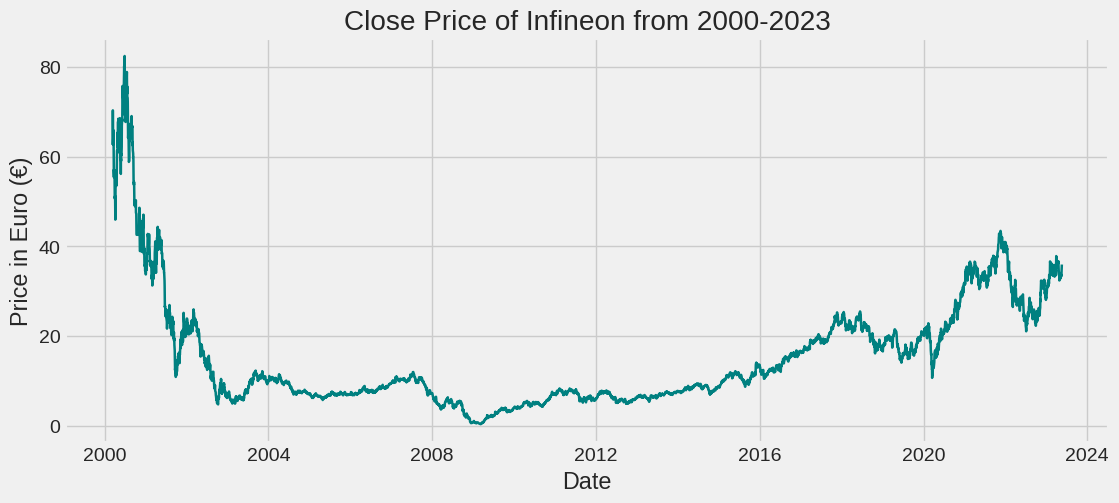

In [84]:
# Plot Close price over time
plt.figure(figsize = (12, 5))
plt.plot(ifx_df.Close, linewidth = 1.8, color = 'teal')
plt.title("Close Price of Infineon from 2000-2023")
plt.ylabel("Price in Euro (€)")
plt.xlabel("Date")
plt.show();

## 2. Machine Learning for stock price prediction

### 2.0. Pre-processing data

In [4]:
# Import libraries
from sklearn.preprocessing import StandardScaler

In [21]:
# Split training and testing sets
train_size = int(len(ifx_df) * 0.8)  # 90% for training, 10% for testing
train_df = ifx_df[:train_size]
test_df = ifx_df[train_size:]

In [22]:
print(train_df.shape)
print(test_df.shape)

(4742, 6)
(1186, 6)


In [23]:
# Create features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

#### Scaling the features
Standardisation is to improve the numerical stability of the model and increase training speed.

In [8]:
# Scale features of training and testing sets
scale = StandardScaler()
X_train = scale.fit_transform(train_df[features])
X_test = scale.transform(test_df[features])

In [9]:
y_train = train_df[target]
y_test = test_df[target]

### 2.1. RandomForest

#### Set-up Random Forest Model

In [10]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Create random forest model
randforest_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, bootstrap = True, random_state = 2023)

In [53]:
randforest_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=20, random_state=2023)

In [54]:
# Get results from predictions
randforest_predictions = randforest_model.predict(X_test)

In [55]:
# Print prediction results
randforest_predictions

array([19.10124001, 19.68278074, 19.68946966, ..., 34.15317056,
       35.36024595, 35.69144893])

#### Statistical metrics and performance evaluation

***Statistical metrics*** assess the model's accuracy and predictive power. Here are some commonly used statistical metrics for evaluating a Random Forest Regressor:

*1. Mean Squared Error (MSE)*: measures the average squared difference between predicted and actual values. A lower MSE indicates better model performance.

*2. Root Mean Squared Error (RMSR)*: is the square root of the MSE and provides the measures if the average prediction error in the same units as the target variables.

*3. Mean Absolute Error (MAE)*: measures the average absolute difference between predicted and actual values. It is less sensitive to outliers compared to MSE.

*4. R-squared ($R^2$)*: represents the proportion of variance in the target variable that is predictable from the input variables. $R^2$ ranges from 0 to 1, where 0 indicates the model does not explain any variance, and 1 indicates a perfect fit.

*5. Explained Variance Score*: quantifies the proportion of variance in the target variable that is explained by the model. The score ranges from 0 to 1, where 1 represents a perfect fit.

In [15]:
# Import libraries
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [56]:
# Compute the statistical metrics
rand_mse = mean_squared_error(y_test, randforest_predictions) 
rand_rmse = np.sqrt(rand_mse)
rand_mae = mean_absolute_error(y_test, randforest_predictions)
rand_r2 = r2_score(y_test, randforest_predictions)
rand_explained_var = explained_variance_score(y_test, randforest_predictions)

In [57]:
# Print results of statistical metrics
print("Mean Squared Error (MSE):", round(rand_mse,3))
print("Root Mean Squared Error (RMSE):", round(rand_rmse,3))
print("Mean Absolute Error (MAE):", round(rand_mae, 3))
print("R-squared (R²):", round(rand_r2, 3))
print("Explained Variance Score:", round(rand_explained_var,3))

Mean Squared Error (MSE): 0.541
Root Mean Squared Error (RMSE): 0.735
Mean Absolute Error (MAE): 0.455
R-squared (R²): 0.991
Explained Variance Score: 0.991


In [18]:
# Compute accuracy score of the model
errors = abs(y_test - randforest_predictions)
mape = 100 * errors/y_test   # compute mean absolute percentage error measures the average percentage difference between the predicted and actual values.
accuracy = 100 - np.mean(mape)
print(f"Accuracy score: {round(accuracy,3)} %")

Accuracy score: 97.016 %


### 2.2. Recurrent Neural Networks (RNNs)

In [24]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

#### Artificial Neural Networks (ANNs) 

ANNs are generally used in supervised learning problems in which we know the target labels of the data. It consists of mainly three layers: input, hidden, and output layer.

In [25]:
# Clear the Keras session
K.clear_session()  # A good practice to call this function before creating a new model to avoid any conflicts or memory leaks

In [26]:
# Create ANNs simple model
ann_model = Sequential()  # create a simple linear stack of layers
ann_model.add(Dense(12, input_dim = 4, activation = 'relu')) # adds a dense (fully connected) layer to the model (the dense layer has 12 units/neurons, input shape of the layer = 4, the rectified linear unit (ReLU) activation function)
ann_model.add(Dense(1)) # adds another dense layer to the model with 1 unit/neuron. This layer serves as the output layer of the network, producing a single output value.
ann_model.summary() # prints a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann_model.compile(loss = tf.keras.metrics.mean_squared_error, metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'rmse')], optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 2, verbose = 1)
ann_model.fit(X_train, y_train, epochs = 100, batch_size = 1, verbose = 1, callbacks = [early_stop], shuffle = False)

In [28]:
# Get prediction results
ann_predictions = ann_model.predict(X_test)

38/38 [==============================] - 0s 1ms/step


In [29]:
# Convert results' shape
ann_predictions = np.squeeze(ann_predictions)

In [30]:
# Compute the statistical metrics
ann_mse = mean_squared_error(y_test, ann_predictions) 
ann_rmse = np.sqrt(ann_mse)
ann_mae = mean_absolute_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)
ann_explained_var = explained_variance_score(y_test, ann_predictions)

In [31]:
# Print results of statistical metrics
print("Mean Squared Error (MSE):", round(ann_mse,3))
print("Root Mean Squared Error (RMSE):", round(ann_rmse,3))
print("Mean Absolute Error (MAE):", round(ann_mae, 3))
print("R-squared (R²):", round(ann_r2, 3))
print("Explained Variance Score:", round(ann_explained_var,3))

Mean Squared Error (MSE): 0.173
Root Mean Squared Error (RMSE): 0.416
Mean Absolute Error (MAE): 0.31
R-squared (R²): 0.997
Explained Variance Score: 0.998


#### Long Short Term Memory (LSTM) 

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) designed to process and predict sequential data, such as time series or text. They have the ability to capture long-term dependencies and handle vanishing or exploding gradient problems typically encountered in traditional RNNs. LSTMs utilize memory cells and a gating mechanism that selectively stores, updates, and retrieves information, allowing them to effectively learn and retain important patterns over extended sequences.

In [33]:
# Reshape the input data to fit the LSTM input shape (samples, time steps, features)
train_X = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_X = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
# Clear previous session
K.clear_session()

In [35]:
# Create LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape = (X_train.shape[1], 1), activation = 'relu', kernel_initializer = 'lecun_uniform', return_sequences = False))
lstm_model.add(Dense(1))
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(loss = tf.keras.metrics.mean_squared_error, metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'rmse')], optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
lstm_model.fit(train_X, y_train, epochs = 100, batch_size = 1, verbose = 1, shuffle = False, callbacks = [early_stop])

In [37]:
# Get prediction results
lstm_predictions = lstm_model.predict(test_X)

38/38 [==============================] - 0s 2ms/step


In [ ]:
# View results
lstm_predictions

In [39]:
# Convert results' shape
lstm_predictions = np.squeeze(lstm_predictions)

In [40]:
# Compute the statistical metrics
lstm_mse = mean_squared_error(y_test, lstm_predictions) 
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_explained_var = explained_variance_score(y_test, lstm_predictions)

In [41]:
# Print results of statistical metrics
print("Mean Squared Error (MSE):", round(lstm_mse,3))
print("Root Mean Squared Error (RMSE):", round(lstm_rmse,3))
print("Mean Absolute Error (MAE):", round(lstm_mae, 3))
print("R-squared (R²):", round(lstm_r2, 3))
print("Explained Variance Score:", round(lstm_explained_var,3))

Mean Squared Error (MSE): 0.527
Root Mean Squared Error (RMSE): 0.726
Mean Absolute Error (MAE): 0.561
R-squared (R²): 0.991
Explained Variance Score: 0.994


#### Gated Recurrent Unit (GRU)
Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture that addresses the vanishing gradient problem and captures long-term dependencies in sequential data. GRU simplifies the architecture of traditional RNNs by incorporating a reset gate and an update gate, allowing it to selectively retain or forget information. This gate mechanism enables GRU to effectively model sequential patterns and has made it popular in tasks such as natural language processing and time series analysis.

In [42]:
# Clear previous session
K.clear_session()

In [45]:
# Create GRU model
gru_model = Sequential()
gru_model.add(GRU(7, input_shape = (X_train.shape[1], 1), activation = 'linear', kernel_initializer = 'lecun_uniform', return_sequences = False))
gru_model.add(Dense(1))
gru_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 7)                 210       
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_model.compile(loss = tf.keras.metrics.mean_squared_error, metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'rmse')], optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 10, verbose = 1)
gru_model.fit(train_X, y_train, epochs = 100, batch_size = 1, verbose = 1, shuffle = False, callbacks = [early_stop])

In [47]:
# Get prediction results
gru_predictions = gru_model.predict(test_X)

38/38 [==============================] - 0s 2ms/step


In [ ]:
# View results
gru_predictions

In [49]:
# Convert results' shape
gru_predictions = np.squeeze(gru_predictions)

In [50]:
# Compute the statistical metrics
gru_mse = mean_squared_error(y_test, gru_predictions) 
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test, gru_predictions)
gru_r2 = r2_score(y_test, gru_predictions)
gru_explained_var = explained_variance_score(y_test, gru_predictions)

In [51]:
# Print results of statistical metrics
print("Mean Squared Error (MSE):", round(gru_mse,3))
print("Root Mean Squared Error (RMSE):", round(gru_rmse,3))
print("Mean Absolute Error (MAE):", round(gru_mae, 3))
print("R-squared (R²):", round(gru_r2, 3))
print("Explained Variance Score:", round(gru_explained_var,3))

Mean Squared Error (MSE): 0.336
Root Mean Squared Error (RMSE): 0.579
Mean Absolute Error (MAE): 0.468
R-squared (R²): 0.994
Explained Variance Score: 0.996


### 3. Results Visualisation

In [58]:
# Create lists of predicted results
randforest_preds = list(y_train) + list(randforest_predictions)
ann_preds = list(y_train) + list(ann_predictions)
lstm_preds = list(y_train) + list(lstm_predictions)
gru_preds = list(y_train) + list(gru_predictions)

In [59]:
# Creat dataframe
predicted_df = pd.DataFrame(ifx_df['Close'])

In [60]:
# Add predicted columns
predicted_df['Rand_Close'] = randforest_preds
predicted_df['ANN_Close'] = ann_preds
predicted_df['LSTM_Close'] = lstm_preds
predicted_df['GRU_Close'] = gru_preds

In [61]:
# View new data
predicted_df

,Close,Rand_Close,ANN_Close,LSTM_Close,GRU_Close
Date,,,,,
2000-03-13,62.641422,62.641422,62.641422,62.641422,62.641422
2000-03-14,70.344551,70.344551,70.344551,70.344551,70.344551
2000-03-15,65.119980,65.119980,65.119980,65.119980,65.119980
2000-03-16,62.677086,62.677086,62.677086,62.677086,62.677086
2000-03-17,63.746967,63.746967,63.746967,63.746967,63.746967
...,...,...,...,...,...
2023-05-15,33.445000,33.786316,33.117855,32.626877,33.029320
2023-05-16,34.200001,34.124056,33.749733,33.201447,33.518032
2023-05-17,34.404999,34.153171,33.722038,33.208096,33.586575


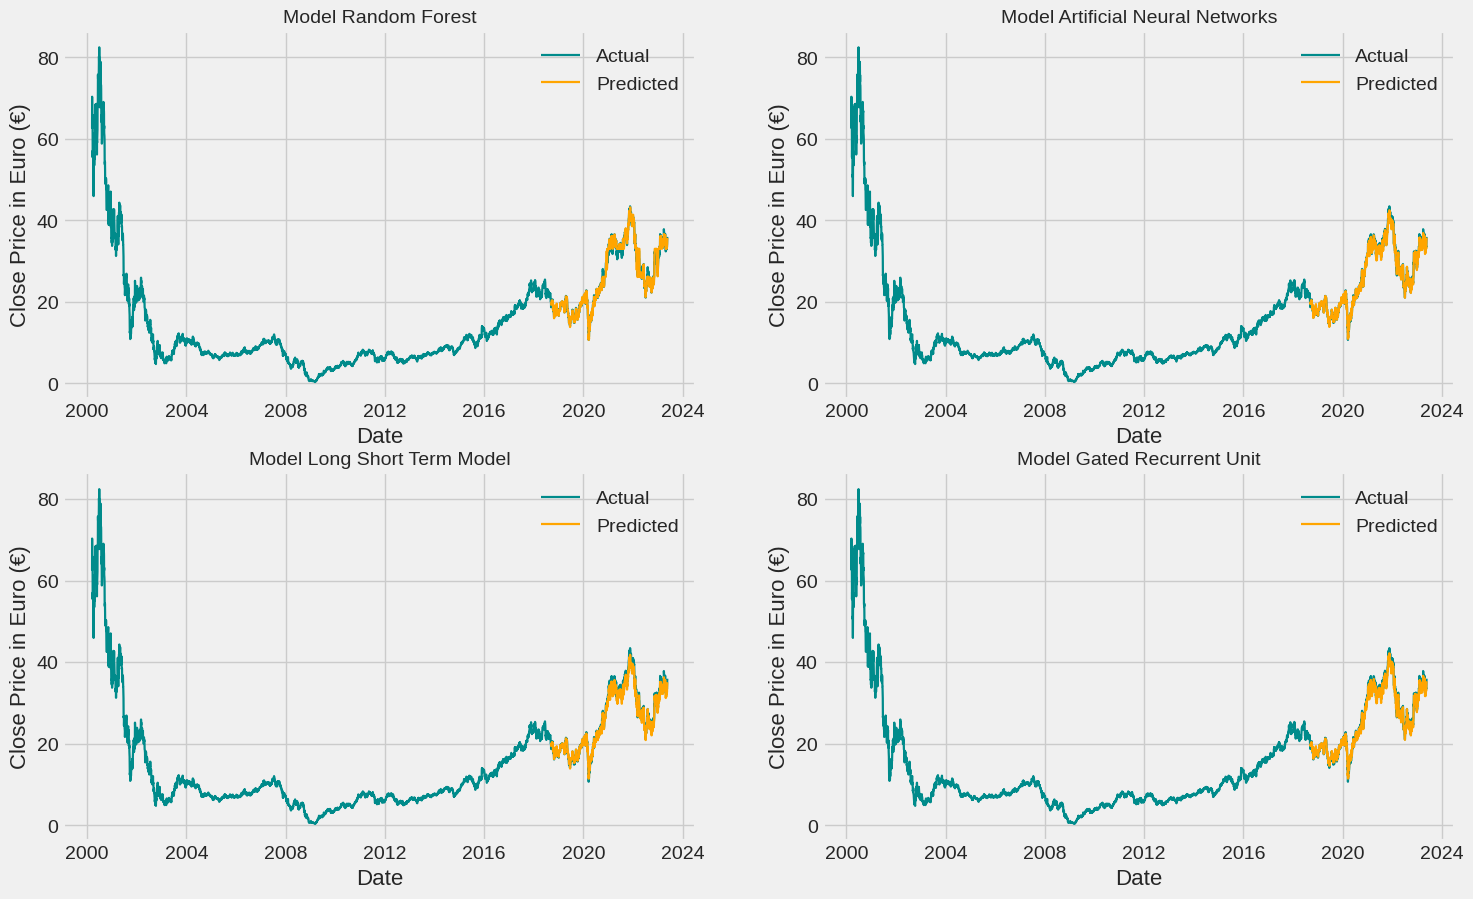

In [85]:
# Create plot
nrows = 2
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = (16, 10))
model_names = ['Random Forest', 'Artificial Neural Networks', 'Long Short Term Model', 'Gated Recurrent Unit']
col_names = ['Rand_Close', 'ANN_Close', 'LSTM_Close', 'GRU_Close']

for i in range(nrows):
    for j in range(ncols):
        idx = i * ncols + j
        col_name = col_names[idx]
        ax[i, j].plot(predicted_df['Close'], linewidth = 1.6, color = 'darkcyan')
        ax[i, j].plot(predicted_df[col_name][train_size:], linewidth = 1.6, color = 'orange')
        ax[i, j].set_title(f"Model {model_names[idx]}", size = 14)
        ax[i, j].set_xlabel("Date", size = 16)
        ax[i, j].set_ylabel("Close Price in Euro (€)", size = 16)
        ax[i, j].legend(["Actual", "Predicted"], loc = "upper right")

plt.show();


### 4. Model Application

In this section, we will apply the created models into new data to see how they predict out-of-sample data.

As the performance of ANN model represents the most relevant, we will use ANN for the prediction.

In [86]:
# Retrieve stock price of Infineon
ifx_df1 = yf.download("IFX.DE", start = dt.datetime(2023,5,20), end = dt.datetime.today())

# See the data
ifx_df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-22,35.990002,36.014999,35.564999,35.955002,35.955002,2397983
2023-05-24,35.340000,35.389999,33.540001,33.724998,33.724998,4983098
2023-05-25,34.000000,34.349998,33.005001,33.095001,33.095001,5842060
2023-05-26,33.509998,34.775002,33.165001,34.544998,34.544998,4347613


In [87]:
# Create X, y test
test_lastweek_X = ifx_df1[features]
test_lastweek_y = ifx_df1[target]

In [88]:
# Scale X test data
test_lastweek_X = scale.transform(test_lastweek_X)

In [89]:
# Get predicted results from ANN model
lastweek_ANN_predictions = ann_model.predict(test_lastweek_X)

1/1 [==============================] - 0s 70ms/step


In [92]:
# Transform predictions array
lastweek_ANN_predictions = np.squeeze(lastweek_ANN_predictions)

In [96]:
# Compute Mean Squared Error
lastweek_mse = mean_squared_error(test_lastweek_y, lastweek_ANN_predictions) 

In [99]:
# Create new dataframe
lastweek_df = pd.DataFrame(test_lastweek_y)

In [100]:
lastweek_df['ANN_Close'] = list(lastweek_ANN_predictions)

In [101]:
lastweek_df

,Close,ANN_Close
Date,,
2023-05-22,35.955002,35.105198
2023-05-24,33.724998,33.602875
2023-05-25,33.095001,33.153023
2023-05-26,34.544998,33.710556
